# Bayes' Theorem


## Review of Conditional Probability?

<img src="img/bayes.jpg"
     width = '500'
     alt="Dice"
     style="float: center; margin-left: 10px;" />
<caption><left> Img Resourse:[Mattbuck](https://commons.wikimedia.org/wiki/User:Mattbuck) </left></caption>
     
     

- In probability theory and statistics, Bayes’ theorem (alternatively Bayes’ law or Bayes’ rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

- In mathematical notation it is expressed as:

$$ P(A|B) = \frac{P(A)P(B|A)}{P(B)} $$

__Notation__

$P(A|B)$ -- probability of A given B

$P(B|A)$ -- probability of B given A


__Note:__ In fact, the reason why such relation holds is easy to show: The main ingredient is the definition of conditional probability:

$$ P(A|B) = \frac{P(A \cap B)}{P(B)}$$

and $$ P(B|A) = \frac{P(B\cap A)}{P(A)} $$


__Your Turn__

Suppose there are two full bowls of cookies. Bowl 1 has 10 chocolate chip and 30 plain cookies, while Bowl 2 has 20 of each. Our friend Fred picks a bowl at random, and then picks a cookie at random. The cookie turns out to be a plain one. How probable is it that Fred picked it out of Bowl 1?

-Hint 1: What are the events A and B?

-Hint 2: What is $P(A)$?

-Hint 3: What is $P(B)$?

A: We pick a cookie from bowl-I

B : We picked a plain cookie

Want to find P(A| B)?

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$


P(B|A) = the probability of we picked a plain cookie given that we know this cookie come from bowl-I

P(B|A) = _your answer here._

P(B) : out of all the cookies what is the probability that we select plain one?

P(B) = _your answer here_

P(A) : probability of taking the cookie from bowl-I

P(A) : _your answer here_




In [1]:
## Finish the problem by finding P(A|B)

## your answer here.

p = (1/2 * 3/4)/(5/8)
p

0.6

## Discussion of the terms in the theorem

$P(A|B)$ -- Posterior

$P(B|A)$ -- Likelihood

$P(A)$ -- Prior

Why these names?

__Your Turn__

Studies from the Journal of the American Medical Association estimate that the sensitivity of common drug tests is about 60% and the specificity is about 99%. That is, the test will produce 60% true positive results for drug users and 99% true negative results for non-drug users. [More on Sensitivity-Specifity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)
Now suppose these tests are applied to a workforce where the actual rate of drug use is 5%. Of the employees who test positive, how many of them actually use drugs?


__Solution:__


Notation:

P(D) -- probability of drug use before we see the outcome of the test

P(D|+)  -- the probability of drug use given a positive test - Note that this is what we want to find.

P(+) -- probability of getting a positive test result

__We want to find:__

$$ P(D|+) = \frac{P(D)P(+|D)}{P(+)} $$

Which one of these are known?

P(D) = 0.05

P(+|D) = 0.60

P(+) = ?

Do we know probability of getting positive test result?

Hint: To get a positive test result we have two cases:

 - Either the subject do use the drug and the test result is positive
 
 - Or the subject is not using the drug and we still get the positive test result.
 
__Try!__

Write a function that return probability of being drug user given the test result is positive. 



In [3]:
# %load -r 17-22 supplement.py
def is_drug(sensitivity, specificity, prior):
    likelihood = sensitivity

    denom = prior * sensitivity + (1 - prior) * (1 - specificity)

    return likelihood * prior / denom

In [4]:
is_drug(sensitivity = 0.6, specificity = 0.99, prior = 0.05)

0.7594936708860758


# Bayesian vs Frequentist

- Chicken or Egg??


-- Parameters are fixed and data varies vs data is fixed and parameters are varying.

1. In frequentist Approach Coin Toss Experiment

 - We set a parameter for having a Head for one coin toss (say p)
 
 - Collect a data (say toss the coin many times)
 
 - Then calculate the probability of getting such data with this parameters.
 
2. In Bayesian Approach:

    - You start with an prior about the parameter (p: probability of getting a H in this case and let's say p can be any number between 0 and 1 and any number is equally likely.)
    
    - Collect data
    
    - Then adjust your prior belief about the distribution of the parameter p.
    


In [5]:
import numpy as np

import matplotlib.pyplot as plt

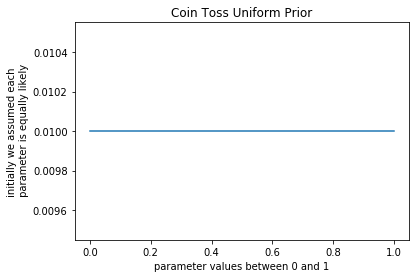

In [6]:
params = np.linspace(0,1, 100)

priors = [1/len(params) for p in params]

plt.plot(params, priors)

plt.xlabel('parameter values between 0 and 1')
plt.ylabel('initially we assumed each\n parameter is equally likely')
plt.title('Coin Toss Uniform Prior')
plt.show()

Let's get some data. Here we will know the true $p$ (probability of getting H or T) parameter but in general if you are tossing a coin 
note that there is no way to know this explicitly.

In [7]:
data  = np.random.binomial(1, p = 0.35, size = 1000)

Now given this data we want to update the prior. 

$$ P(p|data) = \frac{P(data|p)P(p)}{P(data)} $$


In [8]:
## we define a list called posterior
## we will collect updated parameters in this list
posterior = []

## initially we assume all the parameters are equally weighted
priors = [1/len(params) for p in params]

## After each coin toss we will update our prior parameters
for coin in data:
    ## take parameters as p and from priors list take prior
    for p, prior in zip(params,priors):
        
        ## this likelihood is calculated from the numerator of Bayes' theorem
        ## note that 'coin' is either 1 or 0
        ## if coin = 1 p**coin  = p and (1-p)**(1-coin) = 1 so likelihood = p
        ## if coin = 0 p**coin = 1 and (1-p)**(1-coin) = (1-p) so likelihood = 1-p
        likelihood = ((p)**(coin))*((1-p)**(1-coin))
        
        ## posterior is just the multiplication of likelihood and prior
        posterior.append(likelihood*prior)
    
    ## total probability should add up to 1
    ## in Bayes' theorem this corresponds to dividing with P(data)
    posterior = posterior/sum(posterior)
    
    ## for the next coin this adjusted posterior will be a prior
    priors = posterior
    
    ## empty posterior so that we can record new posteriors in this list again
    posterior = []
    
    

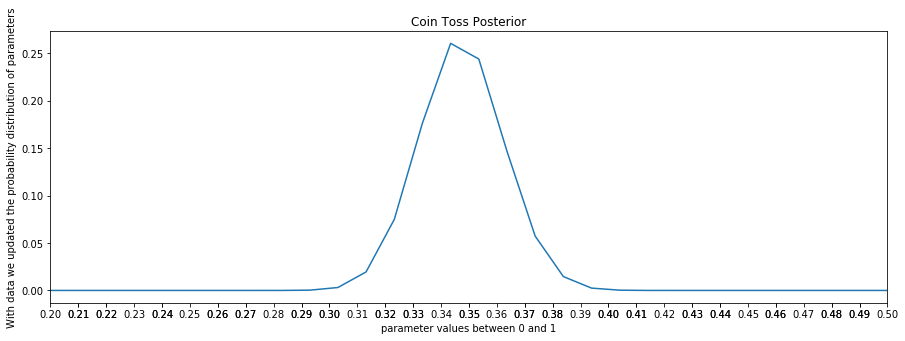

In [9]:
plt.figure(figsize= (15, 5))
plt.plot(params, priors)

plt.xlabel('parameter values between 0 and 1')
plt.ylabel('With data we updated the probability distribution of parameters')
plt.xticks(ticks = np.round(np.linspace(0.2,0.5, 50), 2))
plt.xlim(0.2, 0.5)
plt.title('Coin Toss Posterior')
plt.show()

# Maximum Likelihood Estimation

In [10]:
import numpy as np

from scipy.stats import norm

import matplotlib.pyplot as plt

import pickle

__Try!__

- load the sample data which is a pickled object
- the name of the file is sample.pickle

In [13]:
# %load -r 13-14 supplement.py
with open('sample.pickle', 'rb') as handle:
    s = pickle.load(handle)

In [14]:
s

array([ 8.14513959, 12.22543772, 11.82754601,  8.6578938 ,  7.51052901,
       10.49275333,  9.89496179,  9.95785769,  9.13849707, 10.88576667])

__Try!__

Now write a function that scatter plots of these sample point for a given mean and standard deviation.

[Review the effect of mu and sigma in normal distribution](https://www.intmath.com/counting-probability/normal-distribution-graph-interactive.php)

In [16]:
# %load -r 1-11 supplement.py
def create_dist(sample, parameters=[5, 1]):
    mu = parameters[0]
    sigma = parameters[1]

    X = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)

    plt.plot(X, norm.pdf(X, loc=mu, scale=sigma))

    plt.scatter(sample, norm.pdf(sample, loc=mu, scale=sigma), color='r')

    plt.show()

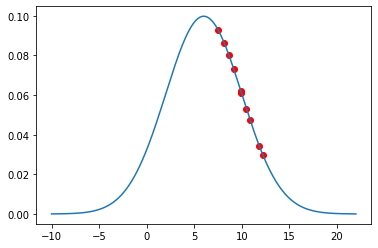

In [17]:
create_dist(sample = s, parameters = [6,4])

[A gentle intro to maximum likelihood](https://www.youtube.com/watch?v=XepXtl9YKwc)

Recall that normal distribution is given as (here x is the variable and $\mu_{0}$ and $\sigma_{0}$ assumed to be known)

$$ \mathcal{N(x, \big|\,\mu_{0}, \sigma_{0})} = \frac{1}{\sqrt{2\pi\sigma_{0}}}exp(-\frac{x- \mu_{0}}{-2\sigma_{0}^{2}})$$

Likelihood will be written as (note that here $x_i$ is assumed to be given):

$$ L(\mu, \sigma\, \big|\,x_{i}) = \frac{1}{\sqrt{2\pi\sigma}}exp(-\frac{x_{i}- \mu}{-2\sigma^{2}})$$

Now write a function that returns likelihood of having some parameters $\mu$ and $\sigma$ given this sample.

or you might want to use __scipy.stats.norm.pdf__

- Case 1: What is the likelihood of having parameters $\mu = 0$ and $\sigma = 1$ for given this sample.

- Case 2: What is the likelihood of having parameters $\mu = 10$ and $\sigma = 3$ for this given sample.

__Q__: How we would find the best parameters?

# Further Research

[A video that explains the math of maximum likelihood method](https://www.youtube.com/watch?v=Dn6b9fCIUpM)